# Mobile average

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

## Load data
The output displayed above illustrates the structure of our dataframe.
It comprises a total of six columns, namely Open, High, Low, Close, Adjusted Close prices, and a
Volume column.
Of particular significance is the Adjusted Close Price series, which encompasses information
related to dividends, stock splits, and various corporate events that can influence stock returns.

In [2]:
df = pd.read_csv("datasets/TCS.NS.csv", index_col="Date")
df.index = pd.to_datetime(df.index)
display(df)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3029.401367,1194289
2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3063.801270,1587601
2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3044.490723,1021913
2022-10-24,3170.100098,3178.000000,3155.000000,3161.699951,3068.071045,260949
2022-10-25,3180.500000,3184.250000,3151.149902,3162.100098,3068.459229,2069643
...,...,...,...,...,...,...
2023-10-12,3575.000000,3588.649902,3538.100098,3542.550049,3542.550049,4241281
2023-10-13,3530.000000,3577.000000,3525.000000,3570.850098,3570.850098,2890357
2023-10-16,3566.000000,3574.649902,3519.100098,3524.050049,3524.050049,1671104


In [3]:
# Check for empty values
print(df.isna().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


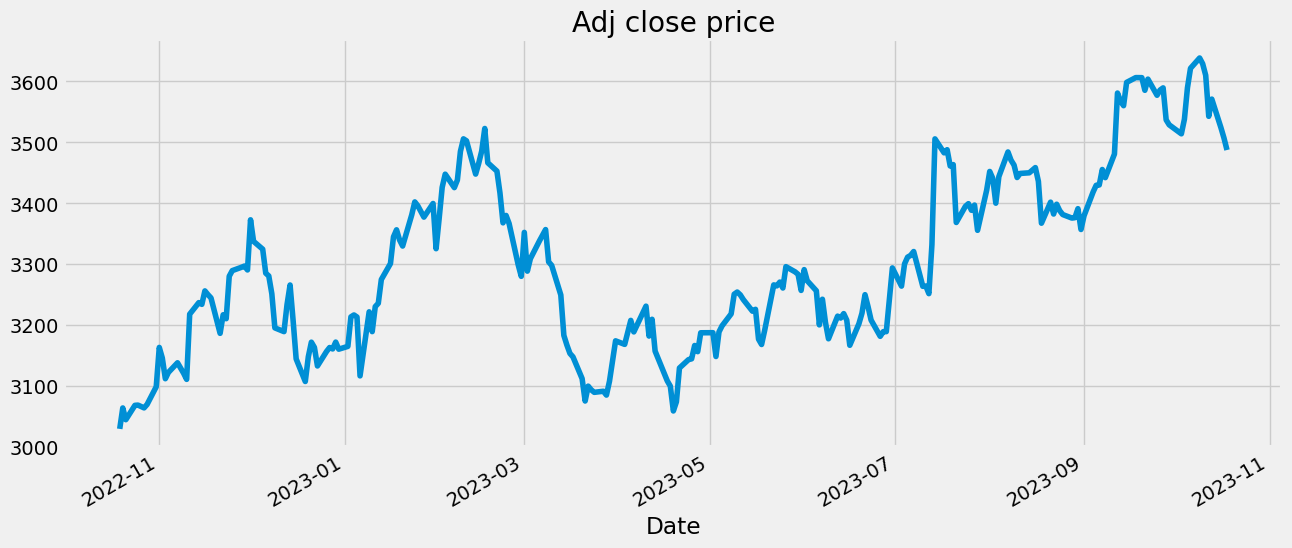

In [4]:
close = df["Adj Close"]
close.plot(figsize=(14, 6), title="Adj close price")
plt.show()

## Moving average

In [5]:
# Custom
def moving_average(series: pd.Series, window_size: int) -> pd.Series:
    result = [np.nan] * (window_size - 1)
    for i in range(window_size, len(series) + 1):
        result.append(series[i - window_size: i].mean())
    return pd.Series(result)   

In [6]:
toy_series = pd.Series((1, 2, 3, 4, 5, 10, 12, 14, 20))
print(moving_average(toy_series, 3))

0          NaN
1          NaN
2     2.000000
3     3.000000
4     4.000000
5     6.333333
6     9.000000
7    12.000000
8    15.333333
dtype: float64


In [7]:
# Pandas built-in
print(toy_series.rolling(3).mean())

0          NaN
1          NaN
2     2.000000
3     3.000000
4     4.000000
5     6.333333
6     9.000000
7    12.000000
8    15.333333
dtype: float64


## Implement MA on data

In [8]:
rolling_window = 50
sma = close.rolling(rolling_window).mean()
print(sma)

Date
2022-10-19            NaN
2022-10-20            NaN
2022-10-21            NaN
2022-10-24            NaN
2022-10-25            NaN
                 ...     
2023-10-12    3488.967002
2023-10-13    3491.343003
2023-10-16    3493.011006
2023-10-17    3495.153008
2023-10-18    3496.027007
Name: Adj Close, Length: 248, dtype: float64


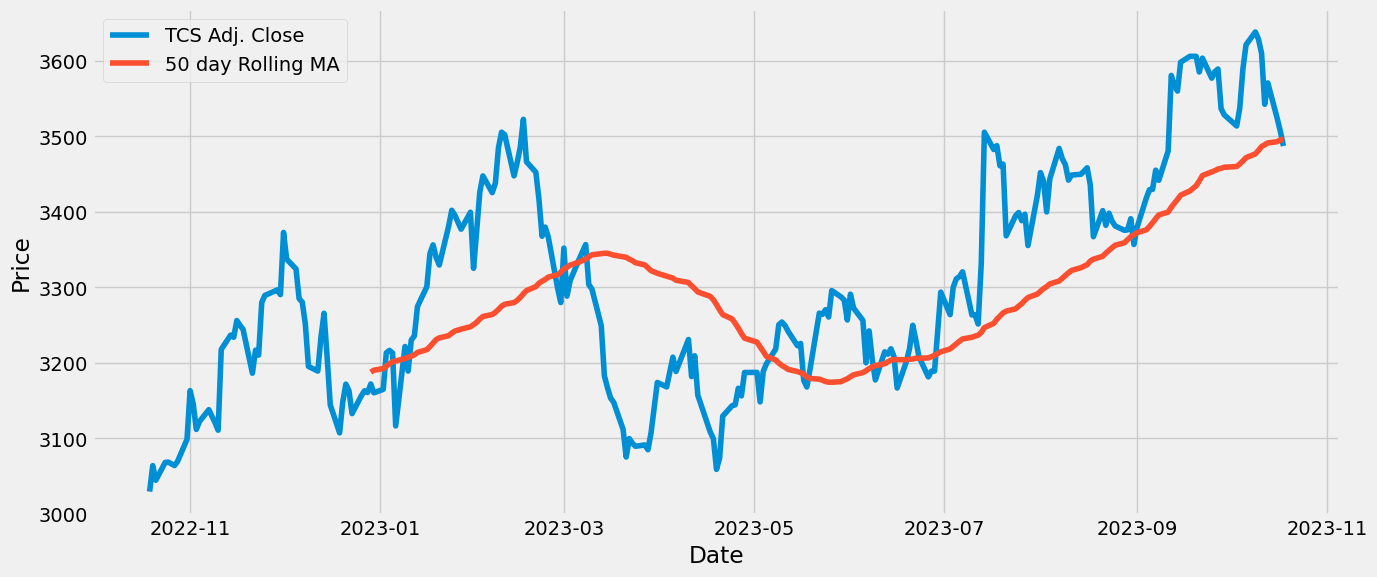

In [9]:
fig, ax = plt.subplots(figsize=(14, 6), tight_layout=True)

ax.plot(close, label="TCS Adj. Close")
ax.plot(sma, label=f"{rolling_window} day Rolling MA")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
plt.show()

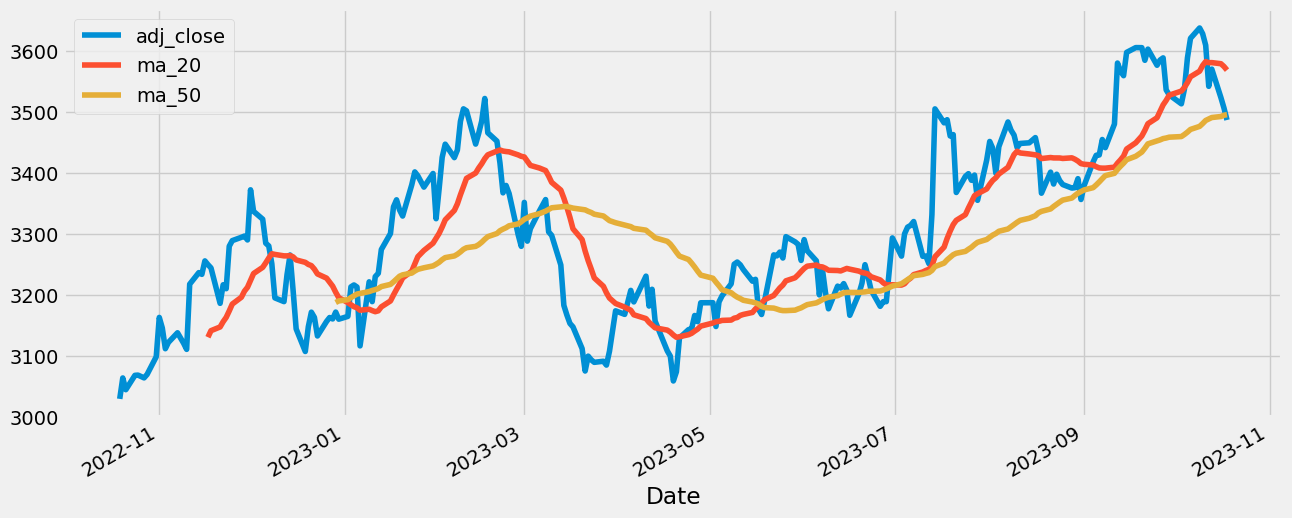

In [10]:
ma_df = pd.DataFrame({
    "adj_close": close,
    "ma_20": close.rolling(20).mean(),
    "ma_50": close.rolling(50).mean()
})
ma_df.plot(figsize=(14, 6))
plt.show()

In the above plot,we can use a technique called "Double Crossover Method" to determine when to SELL/BUY stock.

Within the above setting , a "BUY" signal is generated whenever the '20_day SMA' (shorter MA) crosses
the '50_day SMA' (longer) from "Below".
Like that, a "SELL" signal is generated whenever the '20_day SMA'(shorter)
crosses the '50_day SMA'(longer) from "Above".